In [74]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import calendar

In [21]:
data_alk_base = (r'/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP3_7.0/Alk&DIC/FOCI2.0-NM001_FM_ESM_SSP370os_2014CC105_ALK_DIC_2015to2100.nc')
data_baseline_alk = xr.open_dataset(data_alk_base)

In [22]:
data_alk_oae = (r'/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP3_7.0/Alk&DIC/FOCI2.0-TK200_FMESM_SSP370_alkEU_2014CC105_ALK_DIC_2015to2100.nc')
data_oae_alk = xr.open_dataset(data_alk_oae)

In [23]:
mesh_mask = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/mesh_mask.nc')

In [85]:
mask = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/tmaskm.nc')

In [86]:
mask = mask.tmask.isel(time=0)

In [26]:
# calculate volume for each grid cell

dx = mesh_mask.e1t 
dy = mesh_mask.e2t
dz = mesh_mask.e3t_0
grid_cell_area = dx * dy * dz

In [27]:
gridded_mesh = grid_cell_area.isel(t=0)

In [28]:
# apply mask to weighted grid cells

ocean_area = gridded_mesh * mask

In [29]:
# multiply alkalinity in kg by seawater density 1.025 kg/m3 - unit conversion to mmol/m3

data_baseline_alk = (data_baseline_alk.ALK.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,7))) * 1.025

In [30]:
data_baseline_alk = data_baseline_alk.to_dataset(name='ALK')

In [31]:
ocean_area_sliced = ocean_area.isel(x=slice(520,595),y=slice(330,435),z=slice(0,7))

In [32]:
sliced_alk_baseline = ocean_area_sliced * data_baseline_alk.ALK

In [33]:
regridded_alk_base = sliced_alk_baseline.sum(['x', 'y', 'z']) / ocean_area_sliced.sum(['x', 'y', 'z'])

In [34]:
# multiply alkalinity in kg by seawater density 1.025 kg/m3 - unit conversion to mmol/m3

data_oae_alk = (data_oae_alk.ALK.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,7))) * 1.025

In [35]:
data_oae_alk = data_oae_alk.to_dataset(name='ALK')

In [36]:
sliced_alk_oae = ocean_area_sliced * data_oae_alk.ALK

In [37]:
regridded_alk_oae = sliced_alk_oae.sum(['x', 'y', 'z']) / ocean_area_sliced.sum(['x', 'y', 'z'])

In [38]:
regridded_alk_base = regridded_alk_base.to_dataset(name='ALK')
regridded_alk_oae = regridded_alk_oae.to_dataset(name='ALK')

In [40]:
regridded_alk_base.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_baseline_7.0_weighted.nc')
regridded_alk_oae.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_oae_7.0_weighted.nc')

In [48]:
data_dic_base = (r'/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP3_7.0/Alk&DIC/FOCI2.0-NM001_FM_ESM_SSP370os_2014CC105_ALK_DIC_2015to2100.nc')
data_baseline_dic = xr.open_dataset(data_dic_base)

In [49]:
date_dic_oae = (r'/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP3_7.0/Alk&DIC/FOCI2.0-TK200_FMESM_SSP370_alkEU_2014CC105_ALK_DIC_2015to2100.nc')
data_oae_dic = xr.open_dataset(date_dic_oae)

In [50]:
# multiply DIC in kg by seawater density 1.025 kg/m3 - unit conversion to mmol/m3

data_baseline_dic = (data_baseline_dic.DIC.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,7))) * 1.025

In [51]:
data_baseline_dic = data_baseline_dic.to_dataset(name='DIC')

In [52]:
ocean_area_sliced = ocean_area.isel(x=slice(520,595),y=slice(330,435),z=slice(0,7))

In [53]:
sliced_dic_baseline = ocean_area_sliced * data_baseline_dic.DIC

In [54]:
regridded_dic_base = sliced_dic_baseline.sum(['x', 'y', 'z']) / ocean_area_sliced.sum(['x', 'y', 'z'])

In [55]:
# multiply DIC in kg by seawater density 1.025 kg/m3 - unit conversion to mmol/m3

data_oae_dic = (data_oae_dic.DIC.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,7))) * 1.025

In [56]:
data_oae_dic = data_oae_dic.to_dataset(name='DIC')

In [57]:
sliced_dic_oae = ocean_area_sliced * data_oae_dic.DIC

In [58]:
regridded_dic_oae = sliced_dic_oae.sum(['x', 'y', 'z']) / ocean_area_sliced.sum(['x', 'y', 'z'])

In [59]:
regridded_dic_base = regridded_dic_base.to_dataset(name='DIC')
regridded_dic_oae = regridded_dic_oae.to_dataset(name='DIC')

In [60]:
regridded_dic_base.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_baseline_7.0_weighted.nc')
regridded_dic_oae.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_oae_7.0_weighted.nc')

In [61]:
ocean_area_sliced_dp = ocean_area_sliced.isel(x=slice(58,60),y=slice(41,43))

In [62]:
data_baseline_alk_dp = data_baseline_alk.isel(x=slice(58,60),y=slice(41,43)) # mmol/m3

In [63]:
sliced_alk_baseline_dp = ocean_area_sliced_dp * data_baseline_alk_dp.ALK

In [64]:
regridded_alk_base_dp = sliced_alk_baseline_dp.sum(['x', 'y', 'z']) / ocean_area_sliced_dp.sum(['x', 'y', 'z'])

In [65]:
data_oae_alk_dp = data_oae_alk.isel(x=slice(58,60),y=slice(41,43)) # mmol/m3

In [66]:
sliced_alk_oae_dp = ocean_area_sliced_dp * data_oae_alk_dp.ALK

In [67]:
regridded_alk_oae_dp = sliced_alk_oae_dp.sum(['x', 'y', 'z']) / ocean_area_sliced_dp.sum(['x', 'y', 'z'])

In [68]:
data_baseline_dic_dp = data_baseline_dic.isel(x=slice(58,60),y=slice(41,43)) # mmol/m3

In [69]:
sliced_dic_baseline_dp = ocean_area_sliced_dp * data_baseline_dic_dp.DIC

In [70]:
regridded_dic_base_dp = sliced_dic_baseline_dp.sum(['x', 'y', 'z']) / ocean_area_sliced_dp.sum(['x', 'y', 'z'])

In [71]:
data_oae_dic_dp = data_oae_dic.isel(x=slice(58,60),y=slice(41,43)) # mmol/m3

In [72]:
sliced_dic_oae_dp = ocean_area_sliced_dp * data_oae_dic_dp.DIC

In [73]:
regridded_dic_oae_dp = sliced_dic_oae_dp.sum(['x', 'y', 'z']) / ocean_area_sliced_dp.sum(['x', 'y', 'z'])

In [74]:
regridded_alk_base_dp = regridded_alk_base_dp.to_dataset(name='ALK')
regridded_alk_oae_dp = regridded_alk_oae_dp.to_dataset(name='ALK')
regridded_dic_base_dp = regridded_dic_base_dp.to_dataset(name='DIC')
regridded_dic_oae_dp = regridded_dic_oae_dp.to_dataset(name='DIC')

In [75]:
regridded_alk_base_dp.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_baseline_7.0_weighted_dp.nc')
regridded_alk_oae_dp.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_oae_7.0_weighted_dp.nc')

In [76]:
regridded_dic_base_dp.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_baseline_7.0_weighted_dp.nc')
regridded_dic_oae_dp.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_oae_7.0_weighted_dp.nc')

In [ ]:
# alkalinity weighed only over the z axis (depth)

In [4]:
layer_depth = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [5]:
layer_depth = layer_depth.where(layer_depth)

In [6]:
layer_depth = layer_depth.to_dataframe()

In [7]:
layer_depth['ALK'] = layer_depth['ALK'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

In [8]:
layer_depth = layer_depth.to_xarray()

In [9]:
layer_depth = layer_depth.ALK.sum('deptht')

In [10]:
layer_depth = layer_depth.where(layer_depth)

In [11]:
layer_depth = layer_depth.to_dataset(name='ALK')

In [12]:
layer_depth = layer_depth.to_dataframe()

In [13]:
# condition

max_depth = [
    (layer_depth.ALK == 1),
    (layer_depth.ALK == 2),
    (layer_depth.ALK == 3),
    (layer_depth.ALK == 4),
    (layer_depth.ALK == 5),
    (layer_depth.ALK == 6),
    (layer_depth.ALK == 7)
]

values_depth = [3.046773, 9.454049, 16.363966, 23.89871, 32.20929, 41.481853, 51.94513]

layer_depth['ALK'] = np.select(max_depth, values_depth)

In [14]:
layer_depth = layer_depth.to_xarray()

In [15]:
layer_depth = layer_depth.where(layer_depth)

In [16]:
data_weighted_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [17]:
data_weighted_baseline = (data_weighted_baseline.ALK * 1.025).to_dataset(name='ALK') # mmol/m3

In [18]:
weights_0 = data_weighted_baseline.ALK.isel(deptht=0) * data_weighted_baseline.deptht[0]
weights_1 = data_weighted_baseline.ALK.isel(deptht=1) * (data_weighted_baseline.deptht[1] - data_weighted_baseline.deptht[0])
weights_2 = data_weighted_baseline.ALK.isel(deptht=2) * (data_weighted_baseline.deptht[2] - data_weighted_baseline.deptht[1])
weights_3 = data_weighted_baseline.ALK.isel(deptht=3) * (data_weighted_baseline.deptht[3] - data_weighted_baseline.deptht[2])
weights_4 = data_weighted_baseline.ALK.isel(deptht=4) * (data_weighted_baseline.deptht[4] - data_weighted_baseline.deptht[3])
weights_5 = data_weighted_baseline.ALK.isel(deptht=5) * (data_weighted_baseline.deptht[5] - data_weighted_baseline.deptht[4])
weights_6 = data_weighted_baseline.ALK.isel(deptht=6) * (data_weighted_baseline.deptht[6] - data_weighted_baseline.deptht[5])

In [19]:
weighted_base = (weights_0 + weights_1 + weights_2 + weights_3 + weights_4 + weights_5 + weights_6) / layer_depth

In [20]:
weighted_base = weighted_base.where(weighted_base)

In [21]:
data_weighted_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [22]:
data_weighted_oae = (data_weighted_oae.ALK * 1.025).to_dataset(name='ALK') # mmol/m3

In [23]:
weights_0_oae = data_weighted_oae.ALK.isel(deptht=0) * data_weighted_oae.deptht[0]
weights_1_oae = data_weighted_oae.ALK.isel(deptht=1) * (data_weighted_oae.deptht[1] - data_weighted_oae.deptht[0])
weights_2_oae = data_weighted_oae.ALK.isel(deptht=2) * (data_weighted_oae.deptht[2] - data_weighted_oae.deptht[1])
weights_3_oae = data_weighted_oae.ALK.isel(deptht=3) * (data_weighted_oae.deptht[3] - data_weighted_oae.deptht[2])
weights_4_oae = data_weighted_oae.ALK.isel(deptht=4) * (data_weighted_oae.deptht[4] - data_weighted_oae.deptht[3])
weights_5_oae = data_weighted_oae.ALK.isel(deptht=5) * (data_weighted_oae.deptht[5] - data_weighted_oae.deptht[4])
weights_6_oae = data_weighted_oae.ALK.isel(deptht=6) * (data_weighted_oae.deptht[6] - data_weighted_oae.deptht[5])

In [24]:
weighted_oae = (weights_0_oae + weights_1_oae + weights_2_oae + weights_3_oae + weights_4_oae + weights_5_oae + weights_6_oae) / layer_depth

In [25]:
weighted_oae = weighted_oae.where(weighted_oae)

In [26]:
weighted_base.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_amplitude_base.nc')
weighted_oae.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/ALK_amplitude_oae.nc')

In [27]:
# DIC weighted only over the z axis (depth)

In [28]:
layer_depth = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [29]:
layer_depth = layer_depth.where(layer_depth)

In [30]:
layer_depth = layer_depth.to_dataframe()

In [31]:
layer_depth['DIC'] = layer_depth['DIC'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

In [32]:
layer_depth = layer_depth.to_xarray()

In [33]:
layer_depth = layer_depth.DIC.sum('deptht')

In [34]:
layer_depth = layer_depth.where(layer_depth)

In [35]:
layer_depth = layer_depth.to_dataset(name='DIC')

In [36]:
layer_depth = layer_depth.to_dataframe()

In [37]:
# condition

max_depth = [
    (layer_depth.DIC == 1),
    (layer_depth.DIC == 2),
    (layer_depth.DIC == 3),
    (layer_depth.DIC == 4),
    (layer_depth.DIC == 5),
    (layer_depth.DIC == 6),
    (layer_depth.DIC == 7)
]

values_depth = [3.046773, 9.454049, 16.363966, 23.89871, 32.20929, 41.481853, 51.94513]

layer_depth['DIC'] = np.select(max_depth, values_depth)

In [38]:
layer_depth = layer_depth.to_xarray()

In [39]:
layer_depth = layer_depth.where(layer_depth)

In [40]:
data_weighted_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [41]:
data_weighted_baseline = (data_weighted_baseline.DIC * 1.025).to_dataset(name='DIC') # mmol/m3

In [42]:
weights_0 = data_weighted_baseline.DIC.isel(deptht=0) * data_weighted_baseline.deptht[0]
weights_1 = data_weighted_baseline.DIC.isel(deptht=1) * (data_weighted_baseline.deptht[1] - data_weighted_baseline.deptht[0])
weights_2 = data_weighted_baseline.DIC.isel(deptht=2) * (data_weighted_baseline.deptht[2] - data_weighted_baseline.deptht[1])
weights_3 = data_weighted_baseline.DIC.isel(deptht=3) * (data_weighted_baseline.deptht[3] - data_weighted_baseline.deptht[2])
weights_4 = data_weighted_baseline.DIC.isel(deptht=4) * (data_weighted_baseline.deptht[4] - data_weighted_baseline.deptht[3])
weights_5 = data_weighted_baseline.DIC.isel(deptht=5) * (data_weighted_baseline.deptht[5] - data_weighted_baseline.deptht[4])
weights_6 = data_weighted_baseline.DIC.isel(deptht=6) * (data_weighted_baseline.deptht[6] - data_weighted_baseline.deptht[5])

In [43]:
weighted_base = (weights_0 + weights_1 + weights_2 + weights_3 + weights_4 + weights_5 + weights_6) / layer_depth

In [44]:
weighted_base = weighted_base.where(weighted_base)

In [45]:
data_weighted_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).isel(deptht=slice(0, 7))

In [46]:
data_weighted_oae = (data_weighted_oae.DIC * 1.025).to_dataset(name='DIC') # mmol/m3

In [47]:
weights_0_oae = data_weighted_oae.DIC.isel(deptht=0) * data_weighted_oae.deptht[0]
weights_1_oae = data_weighted_oae.DIC.isel(deptht=1) * (data_weighted_oae.deptht[1] - data_weighted_oae.deptht[0])
weights_2_oae = data_weighted_oae.DIC.isel(deptht=2) * (data_weighted_oae.deptht[2] - data_weighted_oae.deptht[1])
weights_3_oae = data_weighted_oae.DIC.isel(deptht=3) * (data_weighted_oae.deptht[3] - data_weighted_oae.deptht[2])
weights_4_oae = data_weighted_oae.DIC.isel(deptht=4) * (data_weighted_oae.deptht[4] - data_weighted_oae.deptht[3])
weights_5_oae = data_weighted_oae.DIC.isel(deptht=5) * (data_weighted_oae.deptht[5] - data_weighted_oae.deptht[4])
weights_6_oae = data_weighted_oae.DIC.isel(deptht=6) * (data_weighted_oae.deptht[6] - data_weighted_oae.deptht[5])

In [48]:
weighted_oae = (weights_0_oae + weights_1_oae + weights_2_oae + weights_3_oae + weights_4_oae + weights_5_oae + weights_6_oae) / layer_depth

In [49]:
weighted_oae = weighted_oae.where(weighted_oae)

In [50]:
weighted_base.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_amplitude_base.nc')
weighted_oae.to_netcdf('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC_amplitude_oae.nc')

In [81]:
data_try = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_Baseline_2.6_cropped.nc')

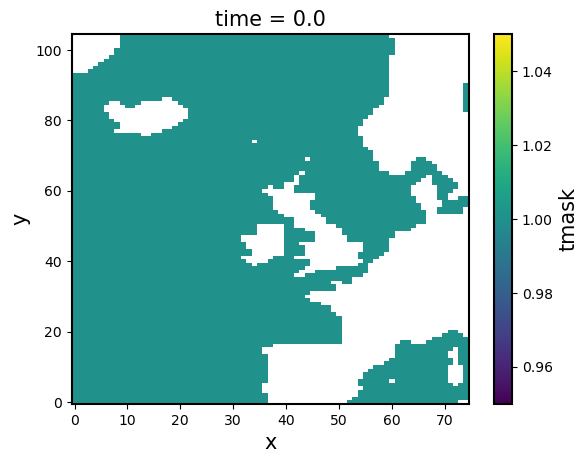

In [89]:
(mask.isel(x=slice(520,595),y=slice(330,435))).isel(z=0).plot()

In [77]:
mask = mask.where((-25.226707 < mask.x) & (mask.x < 23.489141) & (40.357502 < mask.y) & (mask.y < 67.128746), drop=True)